Convolutional Neural Network (cnn) to identify rices with TensorFlow's Keras <br>
<br>
Author: jeremy vachier <br>
Creation date: May 2022 <br>
Publication date: May 2022 <br>
<br>
My goal is to use convolutional neural network (cnn) to identify and classify 5 kind of rices Arborio, Basmati, Ipsala, Jasmine and Karacadag. The data set used here can be found on Kaggle (https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/). For each kind of rices, each folders contain 15 000 pictures. The total number of pictures is 75 000. 
The following analysis is organized as follow. Firstly, I import and pre-process the pictures by renaming them. Secondly, I create three folders 'test', 'train' and 'valid' with the picture randomly chosen. Thirdly, I build a CNN model to identify the 5 different rices provided in the data set. Finally, I train and test the CNN model and visualize the results by plotting the confusion matrix.<br>

Reference: <br>
- https://www.kaggle.com/code/jvachier/deep-learning-90-animals

In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pylab as plt
import os
import random
import shutil
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import cv2

2022-05-15 13:49:03.549568: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-15 13:49:03.549592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
seaborn.set(rc={'figure.figsize':(25,20)})

PREPARE DATA AND PREPROCESSING

In [3]:
os.getcwd()

'./CNN_classification_rice'

In [4]:
rice_names = ['Arborio','Basmati','Ipsala','Jasmine','Karacadag']

In [5]:
os.chdir("./Rice_Image_Dataset/") #change directory path
for rice in rice_names: 
    path="./Rice_Image_Dataset/"+rice
    for count, filename in enumerate(os.listdir(path)):
        src = filename #source
        dst = rice + str(count) + ".jpg" #destination
            # rename() function will
            # rename all the files
        os.rename(os.path.join(path, src), os.path.join(path, dst)) #use join path to point the correct location

Get picture size

In [6]:
im = cv2.imread("./Rice_Image_Dataset/Arborio/Arborio0.jpg")

In [7]:
print(type(im))
print(im.shape)

<class 'numpy.ndarray'>
(250, 250, 3)


For each rices, a train, test and validation directory is created.

In [8]:
os.chdir("./Rice_Image_Dataset/") #to make sure we are in the correct directory
for rice in rice_names: 
    path="./Rice_Image_Dataset/"+rice
    os.chdir(path)
    path2="./Rice_ordered/"
    if os.path.isdir(path2+'train/'+rice) is False: #make sure that the structure does not exist and then create it
        os.makedirs(path2+'train/'+rice)
        os.makedirs(path2+'test/'+rice)
        os.makedirs(path2+'valid/'+rice)
        #15000 pictures in each folder
        for c in random.sample(glob.glob(rice+'*'),8000): #randomly choose 8000 picutres
            shutil.copy(c,path2+'train/'+rice)
        for c in random.sample(glob.glob(rice+'*'),2000): #randomly choose 2000 picutres
            shutil.copy(c,path2+'valid/'+rice)
        for c in random.sample(glob.glob(rice+'*'),3000): #randomly choose 3000 picutres
            shutil.copy(c,path2+'test/'+rice)

In [9]:
train_path = "./Rice_ordered/train/"
test_path = "./CNN_classification_rice/Rice_ordered/test/"
valid_path = "./CNN_classification_rice/CNN_classification_rice/Rice_ordered/valid/"

Use 'ImageDataGenerator' class to create batches of data from the train, valid, and test directories. To plot the confusion matrix, the labels for the test batches are not shuffle.

In [10]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(250,250), classes=rice_names, batch_size=32)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(250,250), classes=rice_names, batch_size=32)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(250,250), classes=rice_names, batch_size=32, shuffle=False)

Found 40000 images belonging to 5 classes.
Found 10000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


TRAINING SET 

In [11]:
imgs, labels = next(train_batches)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


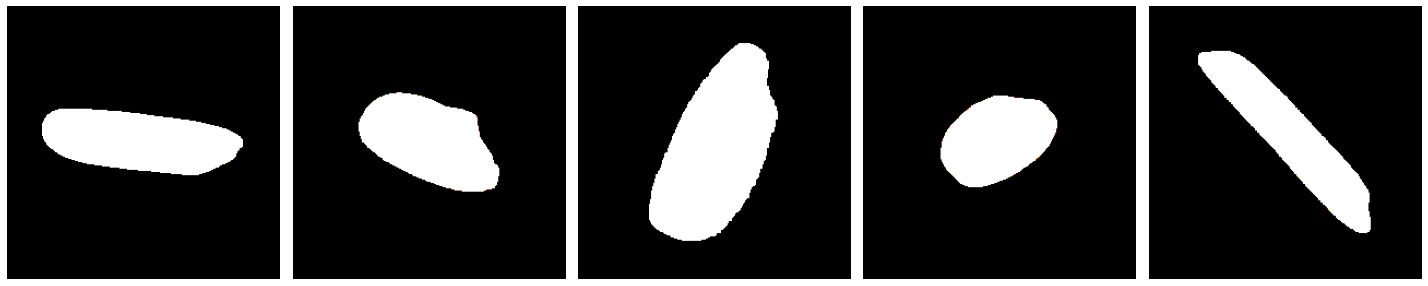

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]


In [13]:
plotImages(imgs)
print(labels)

CONVOLUTIONAL NEURAL NETWORK (CNN) IMPLEMENTATION

Configures the model for training

In [14]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(250,250,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=5, activation='softmax')
])

2022-05-15 13:49:10.738513: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-15 13:49:10.738536: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jeremy-Precision-3551): /proc/driver/nvidia/version does not exist
2022-05-15 13:49:10.738899: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 5)                 1

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=1
)

Epoch 1/5
1250/1250 [==============================] - 1102s 881ms/step - loss: 3.9971 - accuracy: 0.9451 - val_loss: 0.0993 - val_accuracy: 0.9824
Epoch 2/5
1250/1250 [==============================] - 1093s 874ms/step - loss: 0.0705 - accuracy: 0.9871 - val_loss: 0.0275 - val_accuracy: 0.9934
Epoch 3/5
1250/1250 [==============================] - 1035s 828ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.0229 - val_accuracy: 0.9940
Epoch 4/5
1250/1250 [==============================] - 1030s 824ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 5/5
1250/1250 [==============================] - 1030s 824ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0205 - val_accuracy: 0.9950


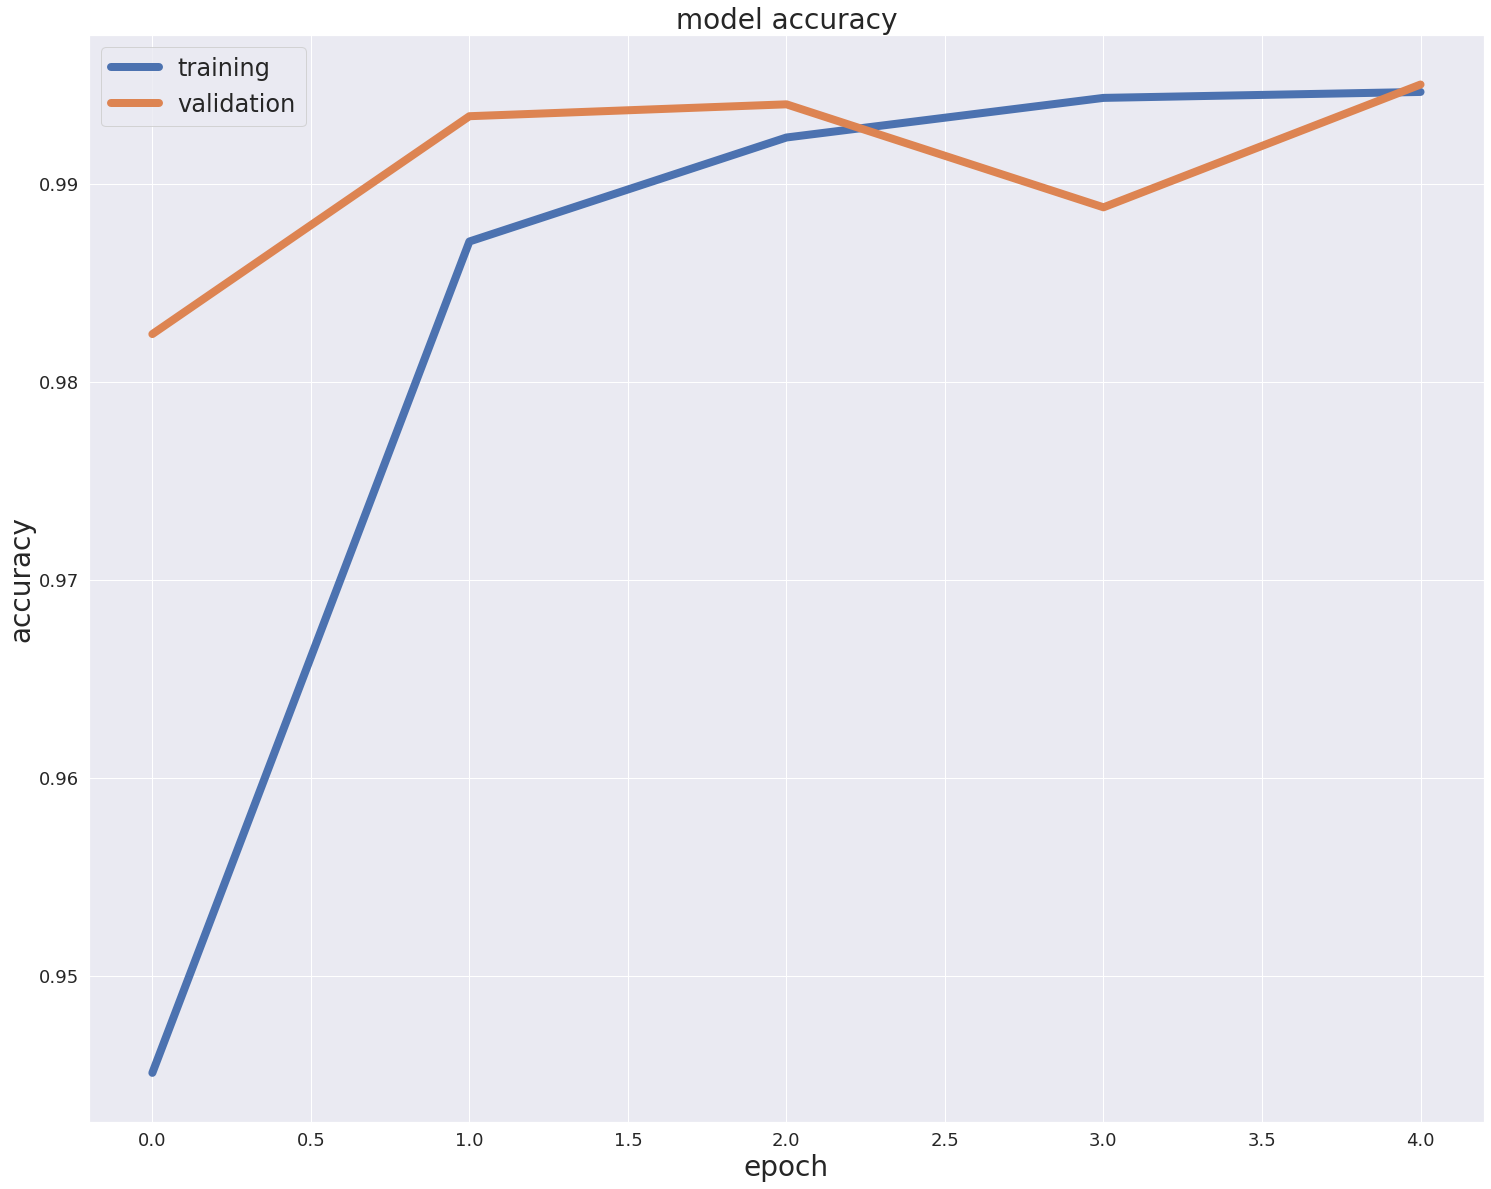

In [18]:
plt.plot(history.history['accuracy'], linewidth=8)
plt.plot(history.history['val_accuracy'], linewidth=8)
plt.title('model accuracy',fontsize=28)
plt.ylabel('accuracy',fontsize=28)
plt.xlabel('epoch',fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['training', 'validation'], loc='upper left',fontsize=24)
plt.show()

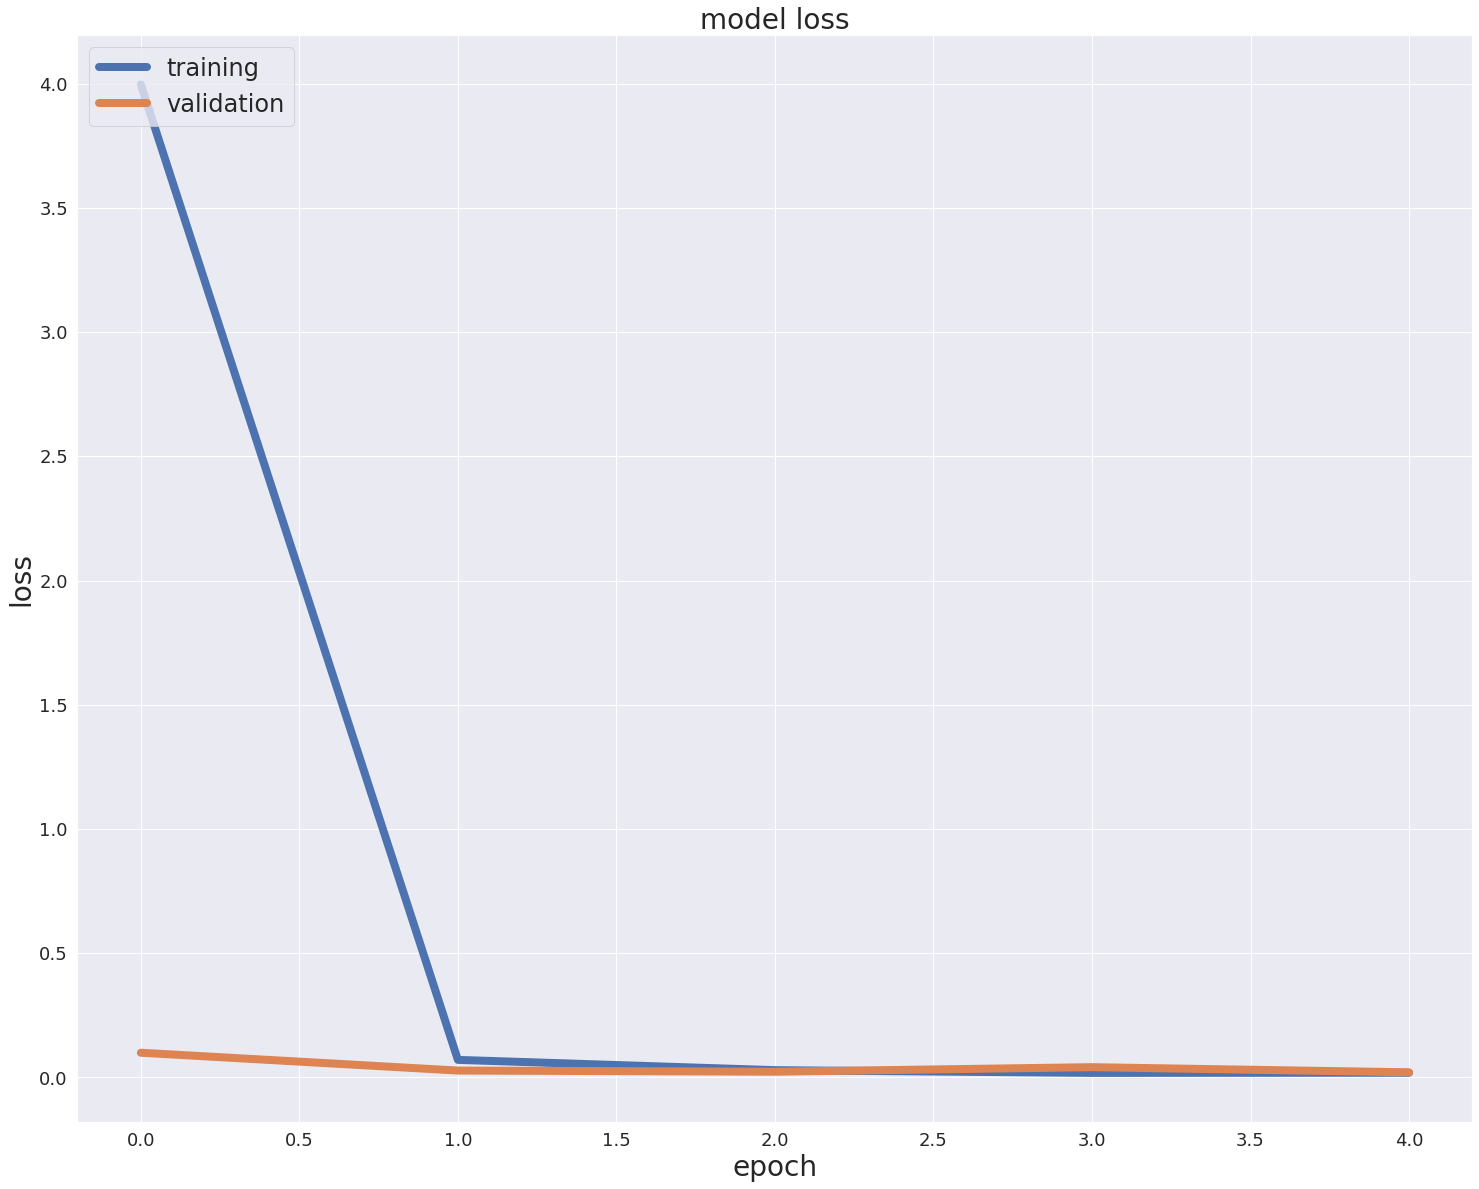

In [19]:
plt.plot(history.history['loss'], linewidth=8)
plt.plot(history.history['val_loss'], linewidth=8)
plt.title('model loss',fontsize=28)
plt.ylabel('loss',fontsize=28)
plt.xlabel('epoch',fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['training', 'validation'], loc='upper left',fontsize=24)
plt.show()

In [20]:
test_imgs, test_labels = next(test_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


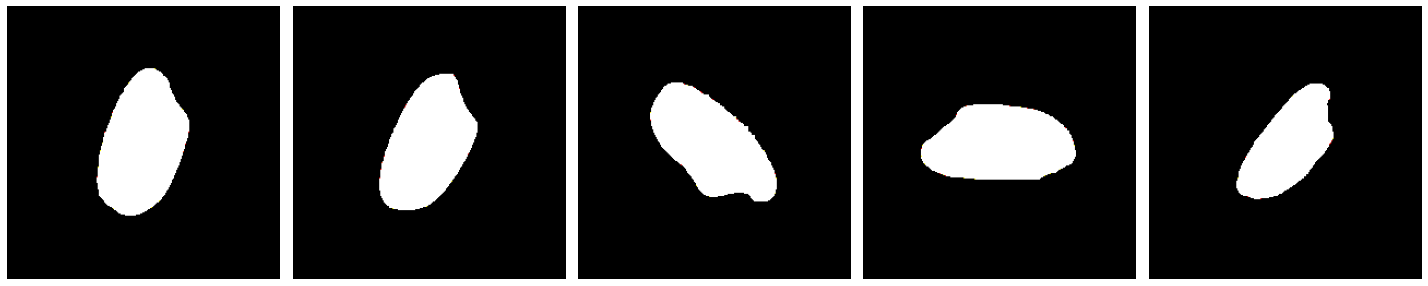

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [21]:
plotImages(test_imgs)
print(test_labels)

In [22]:
test_batches.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [23]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [24]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=18)
    plt.yticks(tick_marks, classes,fontsize=18)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    plt.tight_layout()
    plt.ylabel('True label',fontsize=24)
    plt.xlabel('Predicted label',fontsize=24)

In [26]:
test_batches.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

Normalized confusion matrix
[[9.92333333e-01 0.00000000e+00 6.66666667e-04 1.66666667e-03
  5.33333333e-03]
 [1.00000000e-03 9.96000000e-01 3.33333333e-04 2.66666667e-03
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.33333333e-03 8.00000000e-03 3.33333333e-04 9.88000000e-01
  3.33333333e-04]
 [6.66666667e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.99333333e-01]]


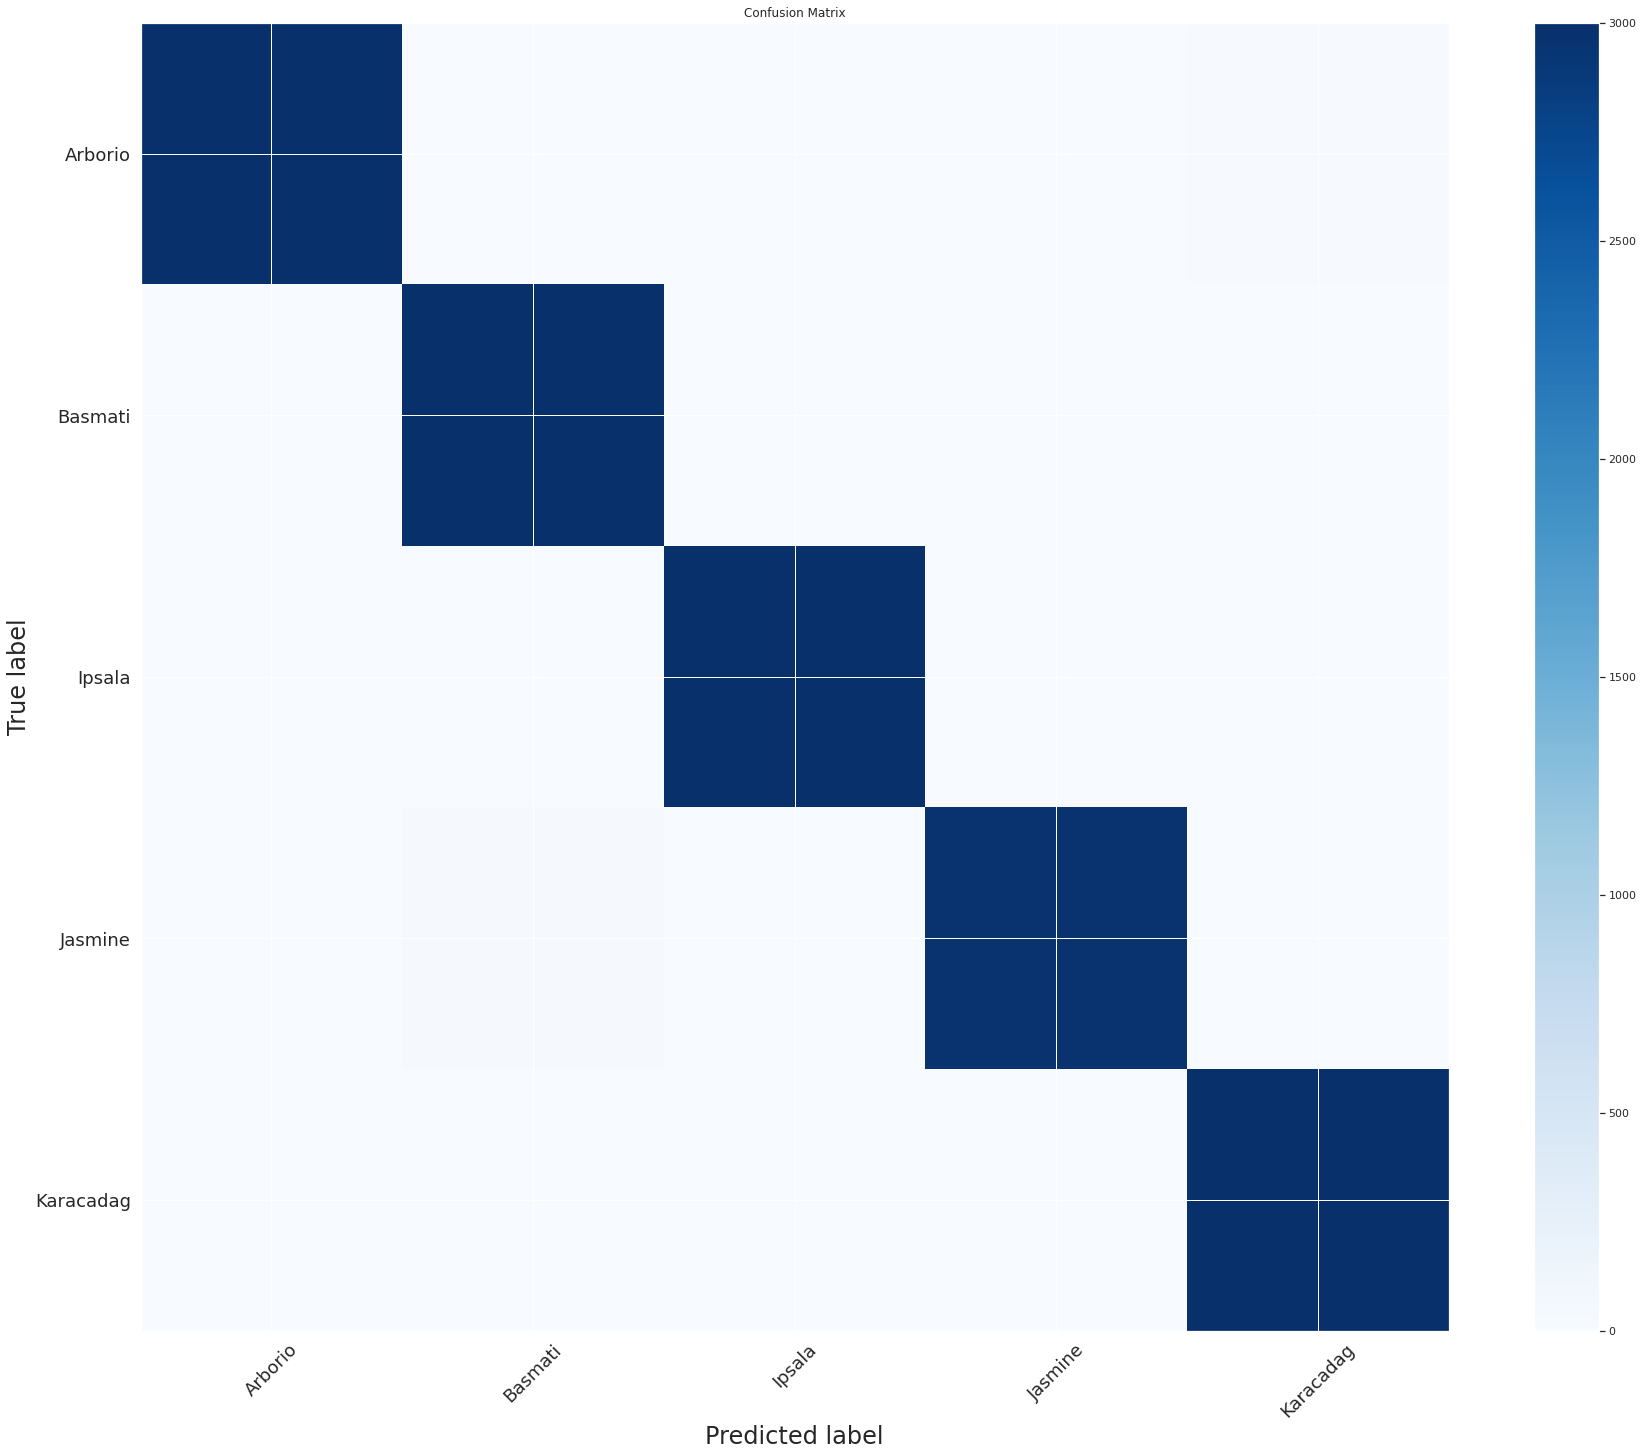

In [28]:
cm_plot_labels = rice_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')